# Chirag Rao K V
## reg: 240962180
## sec: PC  rollno: 66
## WEEK & LAB
## Matches
1. Find the names of teams that are part of IPL. 

2. Visualize the total number of matches won by each team. 

3. List the names of umpires who have served as third umpires and the number of 
matches. 

4. Visualize how many matches were held in each venue. 

5. Visualize the top 10 players identified as the player of the match for the most significant 
number of matches. 

6. Visualize the bottom 10 venues where the least number of matches were played. 

7. Visualize the number of wins of each team for the venue of ‘MA Chidambaram Stadium, 
Chepauk’ 

8. Find and list the venues where the match resulted in a tie.

9. List and visualize the best teams(top 5), season-wise.  

10. Analyse and visualize the relationship between winning the toss and winning the match.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#import the file
df=pd.read_csv('matches.csv')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [38]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [39]:
# Looking for NAN values
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [40]:
# Filling the nan with unknown
df.fillna("Unknown", inplace=True)


/tmp/ipykernel_15316/3254299098.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


In [41]:
# Find the names of teams that are part of IPL.
team1 = df['team1'].unique()
team2 = df['team2'].unique()
for i in team1:
    if i not in team2:
        team2.append(i)
for i in team2:
    print(f"{i}\n")

Royal Challengers Bangalore

Rising Pune Supergiant

Kolkata Knight Riders

Kings XI Punjab

Delhi Daredevils

Sunrisers Hyderabad

Mumbai Indians

Gujarat Lions

Rajasthan Royals

Chennai Super Kings

Deccan Chargers

Pune Warriors

Kochi Tuskers Kerala

Rising Pune Supergiants



Text(0.5, 1.0, 'Win Counnt')

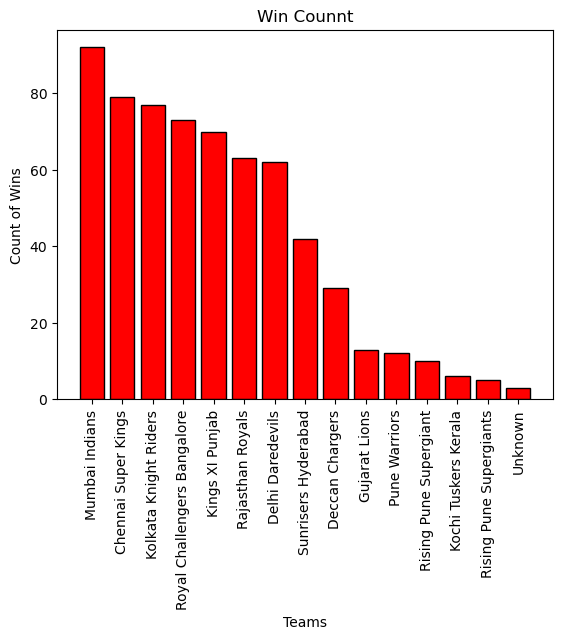

In [42]:
# Visualize the total number of matches won by each team.
winner = df["winner"].value_counts()
plt.bar(winner.index,winner.values, color='red', edgecolor='black')
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Count of Wins")
plt.title("Win Counnt")


In [43]:
#List the names of umpires who have served as third umpires and the number of matches.
# I have listed 2nd umpire as 3rd umpier is miss
df['umpire2'].value_counts()


umpire2
SJA Taufel         54
C Shamshuddin      50
S Ravi             49
RJ Tucker          38
CK Nandan          36
RB Tiffin          30
VA Kulkarni        28
SK Tarapore        26
BNJ Oxenford       25
AM Saheba          23
M Erasmus          22
RE Koertzen        21
DJ Harper          18
AK Chaudhary       15
HDPK Dharmasena    14
SL Shastri         13
K Srinath          13
NJ Llong           13
K Hariharan        11
S Asnani           11
CB Gaffaney        10
VK Sharma           9
PR Reiffel          8
RK Illingworth      8
BR Doctrove         8
Nitin Menon         8
IL Howell           7
GA Pratapkumar      6
SS Hazare           6
AL Hill             6
I Shivram           6
PG Pathak           6
TH Wijewardene      5
A Nand Kishore      5
S Das               5
AV Jayaprakash      4
BG Jerling          4
K Srinivasan        3
A Deshmukh          3
MR Benson           2
SD Ranade           2
Unknown             1
SJ Davis            1
Subroto Das         1
JD Cloete           1
SD

Text(0.5, 1.0, 'Venue stats')

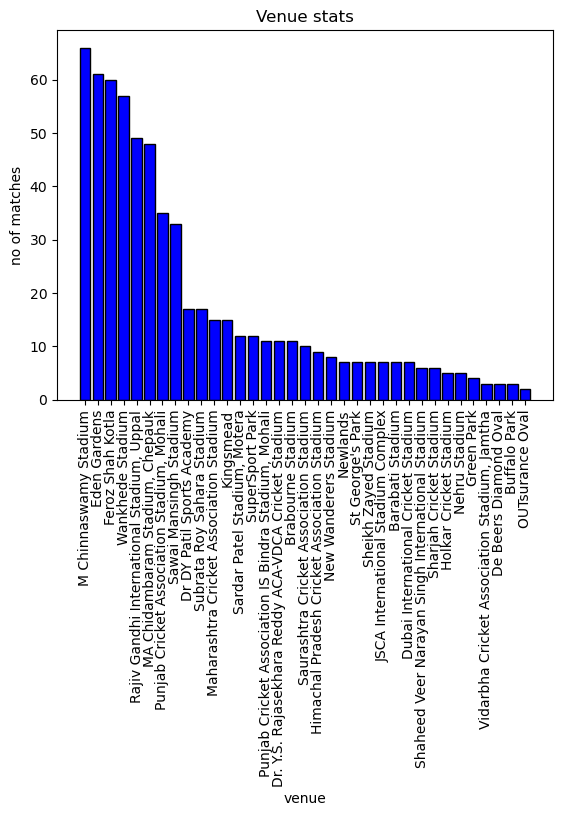

In [44]:
#Visualize how many matches were held in each venue.
venue = df['venue'].value_counts()
plt.bar(venue.index,venue.values, color='blue', edgecolor='black')
plt.xlabel("venue")
plt.ylabel("no of matches")
plt.xticks(rotation=90)
plt.title("Venue stats")

# It can be seen that M Chinnaswamy Stadium has hosted the maximum number of matches and OUTsurance Oval has least hosted matches

In [45]:
#Visualize the top 10 players identified as the player of the match for the most significant number of matches.
df['player_of_match'].value_counts().head(10)

player_of_match
CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: count, dtype: int64

Text(0.5, 1.0, 'Venue stats')

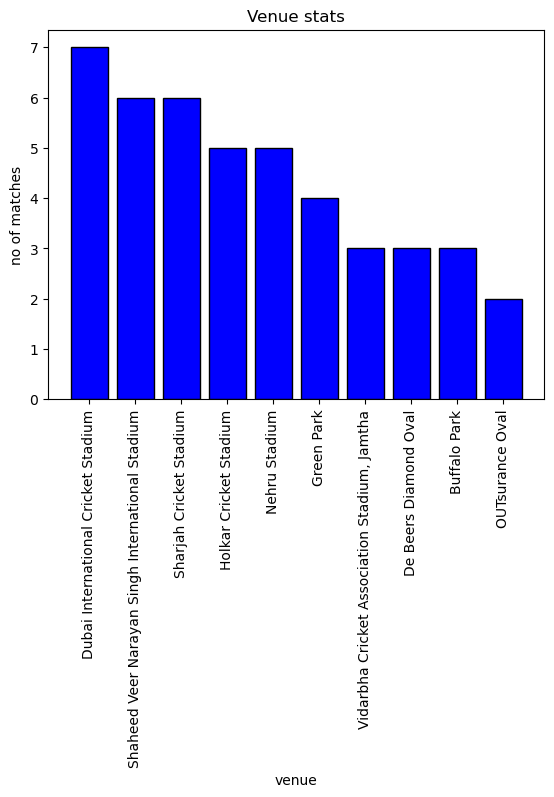

In [46]:
#Visualize the bottom 10 venues where the least number of matches were played.
least_venue = df['venue'].value_counts().tail(10)
plt.bar(least_venue.index,least_venue.values, color='blue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("venue")
plt.ylabel("no of matches")
plt.title("Venue stats")

Text(0.5, 1.0, 'win stats')

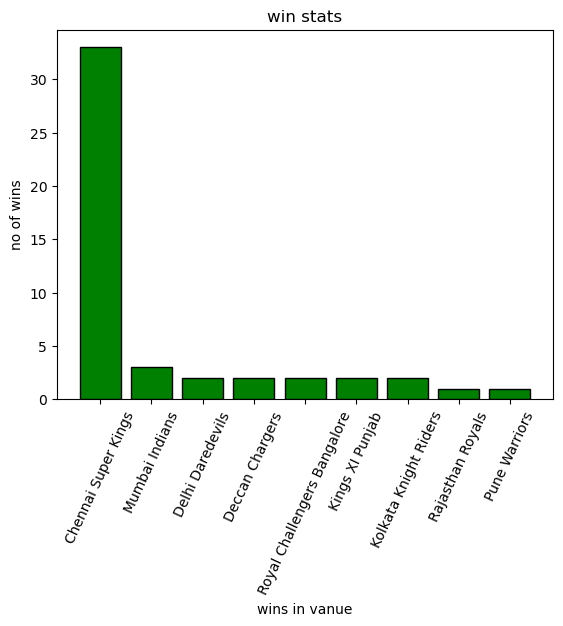

In [47]:
#Visualize the number of wins of each team for the venue of ‘MA Chidambaram Stadium, Chepauk’
winners_vanue = df[df['venue'] == 'MA Chidambaram Stadium, Chepauk']["winner"].value_counts()
plt.bar(winners_vanue.index,winners_vanue.values, color='green', edgecolor='black')
plt.xlabel("wins in vanue")
plt.xticks(rotation=65)
plt.ylabel("no of wins")
plt.title("win stats")

In [48]:
#Find and list the venues where the match resulted in a tie.
df[df['result'] == 'tie']['venue'].value_counts()

venue
Saurashtra Cricket Association Stadium       1
Newlands                                     1
MA Chidambaram Stadium, Chepauk              1
Rajiv Gandhi International Stadium, Uppal    1
M Chinnaswamy Stadium                        1
Sheikh Zayed Stadium                         1
Sardar Patel Stadium, Motera                 1
Name: count, dtype: int64

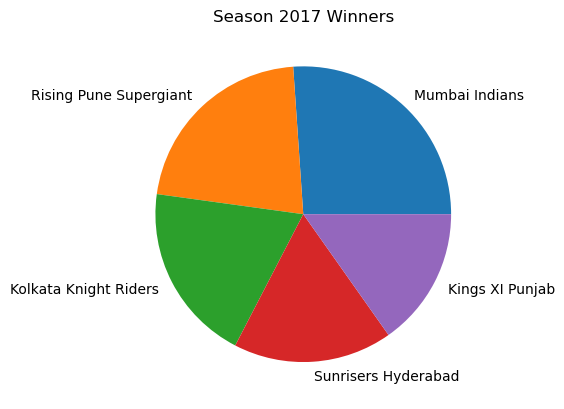

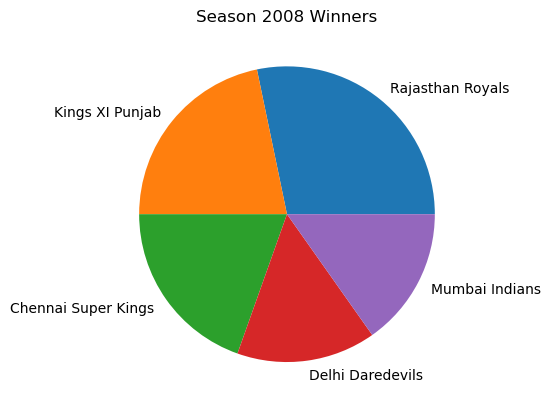

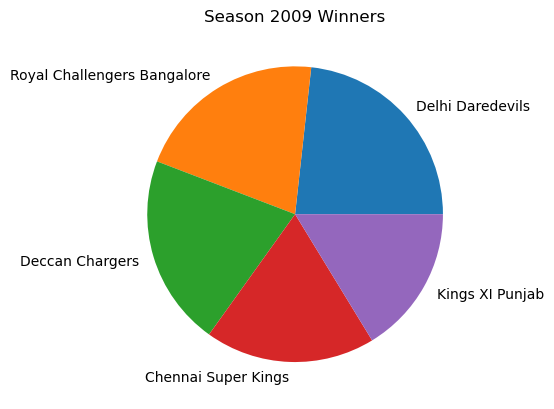

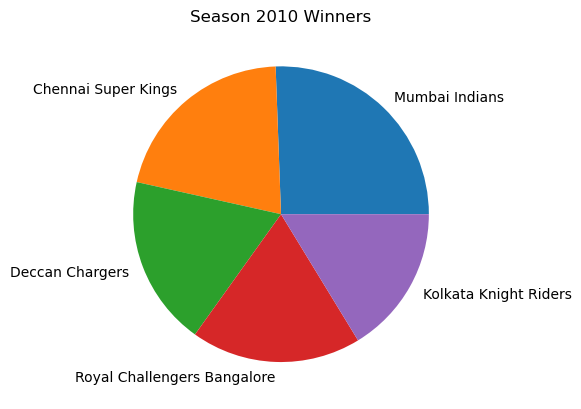

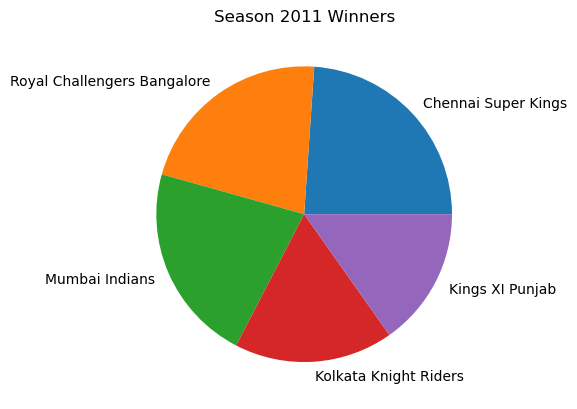

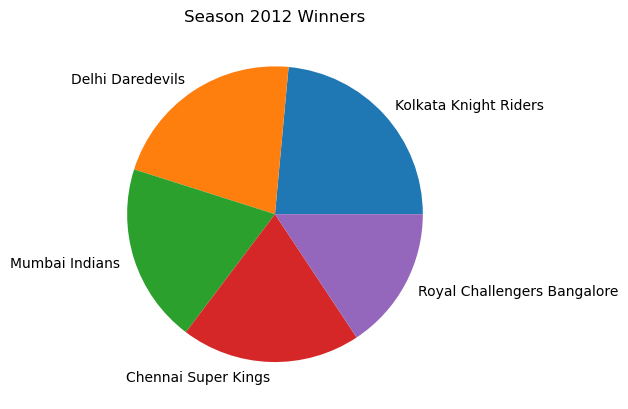

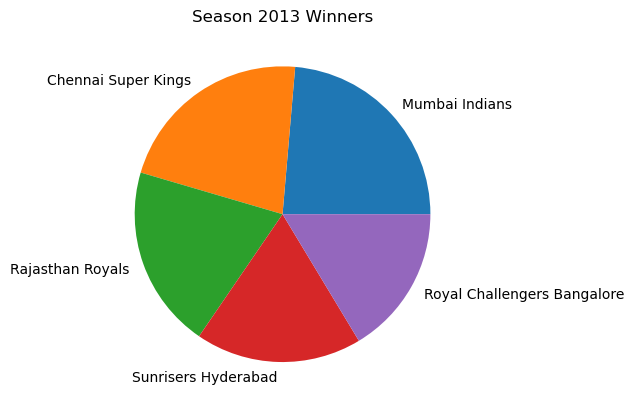

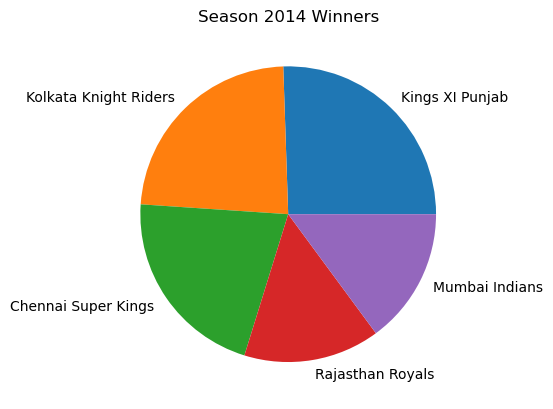

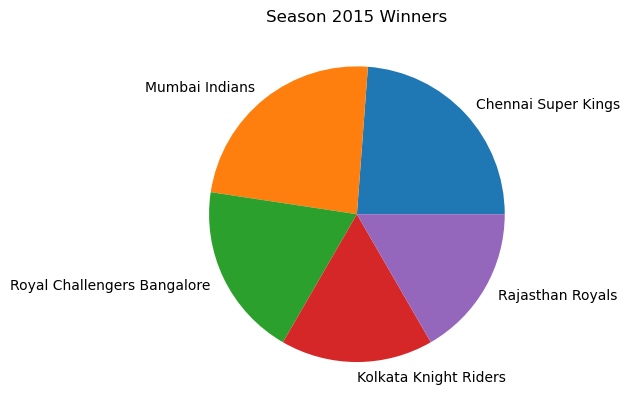

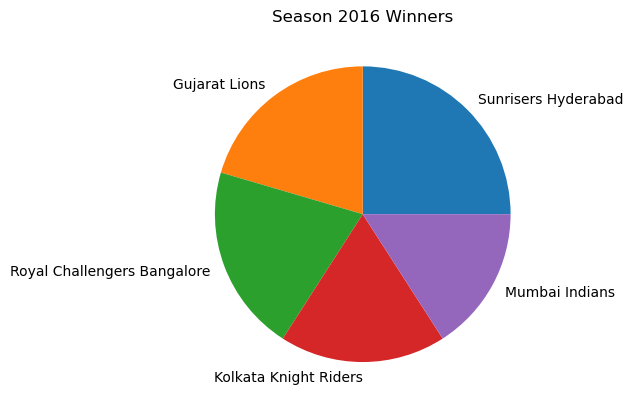

In [49]:
#List and visualize the best teams(top 5), season-wise.
seasons = df['season'].unique()
for i in seasons:
    winner = df[df['season'] == i]['winner'].value_counts().head(5)
    plt.pie(winner.values, labels=winner.index)  # Fix: labels instead of values
    plt.title(f'Season {i} Winners')
    plt.show()
    

In [50]:
#Analyse and visualize the relationship between winning the toss and winning the match
winner_tos_winner = df[df['toss_winner'] == df['winner']]["winner"].count()
winner_tos_not_winner = df[df['toss_winner'] != df['winner']]["winner"].count()

Text(0.5, 1.0, 'Toss vs win stats')

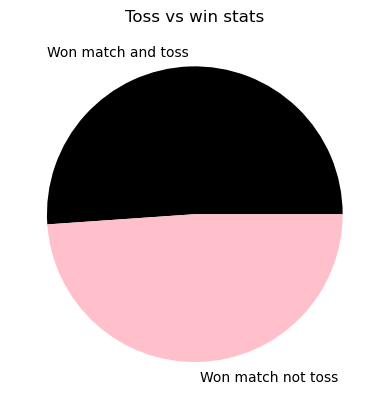

In [51]:
winner = df[df['season'] == i]['winner'].value_counts().head(5)
plt.pie([winner_tos_winner,winner_tos_not_winner], labels=["Won match and toss","Won match not toss"],colors = ['black','pink'])  # Fix: labels instead of values
plt.title('Toss vs win stats')